<a href="https://colab.research.google.com/github/Taska23/IOD/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%A4%D0%B0%D0%BA%D1%82%D0%BE%D1%80%D0%BD%D0%B8%D0%B9_%D1%82%D0%B0_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%BD%D0%B8%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%92%D0%B5%D1%80%D0%BD%D0%B8%D0%B3%D0%BE%D1%80_%D0%A2%D0%9A_4_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Встановлюємо та імпортуємо потрібні бібліотеки###      



In [ ]:
!pip install factor_analyzer
import pandas as pd 
from factor_analyzer import FactorAnalyzer
from matplotlib import pyplot
from google.colab import drive

     |████████████████████████████████| 40kB 4.6MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp36-none-any.whl size=40380 sha256=95b569db8ce810c17d3d422c033cf73f0a2586707513744601567ba9e5f8d19f
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Pashko/A4.txt", header=None)
df.columns = [str(i+1)  for i in range(12)]

Нормалізуємо данні 

In [ ]:


from sklearn import preprocessing
x = df.iloc[:, :12].values 
x_scaled = preprocessing.scale(x)
df = pd.DataFrame(x_scaled)

df.iloc[:, 0:12].describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,-4.013456e-17,-2.170486e-17,-1.449396e-17,1.986189e-17,-2.663980e-17,-3.812783e-17,5.734302e-18,2.152722e-17,9.137135e-18,9.925394e-18,-5.917489e-18,1.504352e-17
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-6.378681e-01,-2.165017e+00,-7.517782e+00,-7.859590e+00,-9.011254e-01,-7.551608e+00,-7.355150e+00,-6.847927e+00,-6.530675e+00,-4.594319e+00,-3.553427e+00,-2.206861e+00
25%,-2.739146e-01,-4.234840e-01,1.345909e-02,4.147869e-02,-2.819753e-01,-1.464187e-01,-1.324058e-01,-2.226648e-01,-1.545420e-01,-1.256473e-01,-1.058434e-01,-1.224614e-01
50%,-1.860139e-01,-7.747932e-02,1.572280e-01,1.768772e-01,-1.887386e-01,1.295414e-01,-9.615334e-03,-1.290625e-01,-7.488378e-02,-5.722511e-02,-4.383893e-02,-3.829746e-02
75%,-8.791383e-02,2.049530e-01,2.958045e-01,2.854191e-01,-5.231139e-02,3.697395e-01,1.235287e-01,4.933454e-02,5.378000e-02,6.833511e-03,1.072823e-02,1.439835e-02
max,7.862212e+00,7.257757e+00,1.650252e+00,1.072318e+00,7.734733e+00,3.543814e+00,1.902907e+00,5.539323e+00,6.278051e+00,7.652970e+00,7.761749e+00,7.952131e+00


Будуємо корелляційну матрицю 

In [ ]:
corrMatrix = df.corr()

Щоб наша матриця виглядала більш зрозуміло використаємо бібліотеку seaborn

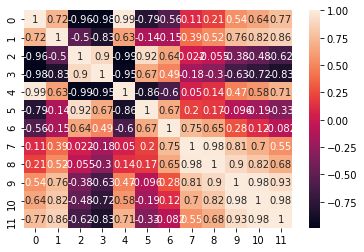

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(corrMatrix, annot=True)
plt.show()

Далі знаєдемо власні значення та впорядкуємо значимість факторів 

[7.16086165e+00 3.93720645e+00 7.02580256e-01 1.75646432e-01
 1.39287026e-02 3.03491375e-03 2.53431919e-03 1.48637021e-03
 1.28178316e-03 9.74726447e-04 3.59456134e-04 1.04934560e-04] [ 7.017639    3.95658509  1.14075131  0.42560442  0.07374256 -0.01243579
 -0.12742771 -0.16511447 -0.29030414 -0.31286726 -0.32740639 -0.35438415]


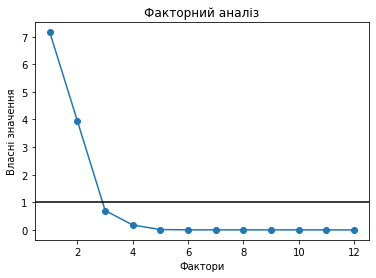

In [ ]:
import scipy.linalg as la

eig = la.eigh(corrMatrix, eigvals_only=False)

fa = FactorAnalyzer()
fa.fit(df, 5)

ev, v = fa.get_eigenvalues()
print(ev, v)
# plt.plot(ev)

plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Факторний аналіз')
plt.xlabel('Фактори')
plt.ylabel('Власні значення')
plt.axhline(y=1,c='k')

Тепер шукаємо вектори

In [ ]:
fa = FactorAnalyzer(3, rotation='varimax')
fa.fit(df)
loads = fa.loadings_
print(loads)

[[-0.83126871  0.54666209  0.04389044]
 [-0.23687238  0.89566974  0.2164609 ]
 [ 0.94845024 -0.31325689  0.02360842]
 [ 0.72229132 -0.676592   -0.08510026]
 [-0.89223126  0.44652821  0.01454585]
 [ 0.99192343  0.05506252  0.11802243]
 [ 0.5859944  -0.21089593  0.7541373 ]
 [ 0.0697626   0.20276807  0.96384382]
 [ 0.03870445  0.36256591  0.9315539 ]
 [-0.20990373  0.63770072  0.7288167 ]
 [-0.29475803  0.70793353  0.61212922]
 [-0.41525856  0.7606627   0.45578569]]


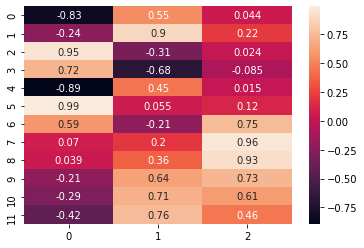

In [ ]:
sn.heatmap(loads, annot=True)
plt.show()

In [ ]:
df.iloc[:,0:11:4]

,0,4,8
0,0.256003,0.146197,-0.599335
1,0.130525,0.045489,-0.601157
2,0.018133,-0.042460,-0.603141
3,-0.068527,-0.106400,-0.604220
4,-0.120894,-0.139803,-0.602074
...,...,...,...
4995,-0.262825,-0.181680,0.069279
4996,-0.275374,-0.188076,0.062790
4997,-0.282345,-0.197225,0.042899
4998,-0.280396,-0.205241,0.012981


Факторний аналіз k-Means

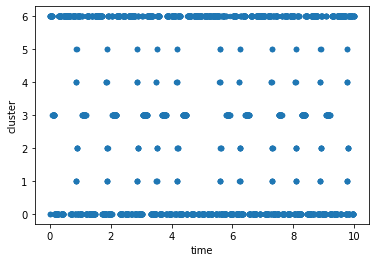

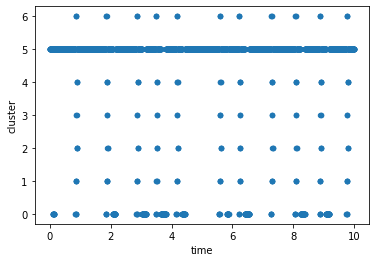

In [ ]:
from sklearn.cluster import KMeans

params12 = KMeans(n_clusters=7, random_state=0).fit_predict(df.iloc[:,0:12])
  #print("Point", i, "have cluster: ", params12[i])
dataFrame12 = pd.DataFrame({"cluster": params12, "time":[i*0.002 for i in range(0,5000)]})
dataFrame12.plot.scatter(x='time', y='cluster')

df = pd.read_csv("/content/drive/My Drive/Pashko/A4.txt", header=None)

params3 = KMeans(n_clusters=7, random_state=0).fit_predict(df.iloc[:,0:11:4])

dataFrame3 = pd.DataFrame({"cluster": params3, "time":[i*0.002 for i in range(0,5000)]})
dataFrame3.plot.scatter(x='time', y='cluster')

df = pd.read_csv("/content/drive/My Drive/Pashko/A4.txt", header=None)